# Ski Turn Identification

At its simplest, ski turning can be defined as either carving or skidding. 

In [1]:
from decode import decode_A50, decode_A50_downhill, decode_F6P, decode_tile
import matplotlib.pyplot as plt
from sync import syncTile, splitTileIntoDownhillTracks
from load import load_2023_12_30
from tile import Tile
from track import Track
from stitch import stitch

a50_2023_12_30, a50_all_2023_12_30, f6p_2023_12_30, tile_2023_12_30 = load_2023_12_30()

## Synchronize Tile Data with A50 Ground Truth

In [2]:
tile_2023_12_30_sync = syncTile(
    tile=tile_2023_12_30,
    truth=a50_all_2023_12_30,
    printOutput=True,
    # use_mae=False,
    time_step_s=0.5,
    max_time_search_s=30,
    alt_step=0.25,
    min_alt_start=120,
    max_alt_search=140)

Timestamp offset: 8000
Altitude offset: 131.75


In [3]:
tile_2023_12_30_runs = splitTileIntoDownhillTracks(tile_2023_12_30_sync, a50_2023_12_30)

93400 104900
167800 179200
185200 189200


In [4]:
run1 = tile_2023_12_30_runs[0]
run2 = tile_2023_12_30_runs[1]

In [5]:
run1_2023_12_30_euler6 = run1.imu6dof()
run1_2023_12_30_euler9 = run1.imu9dof()

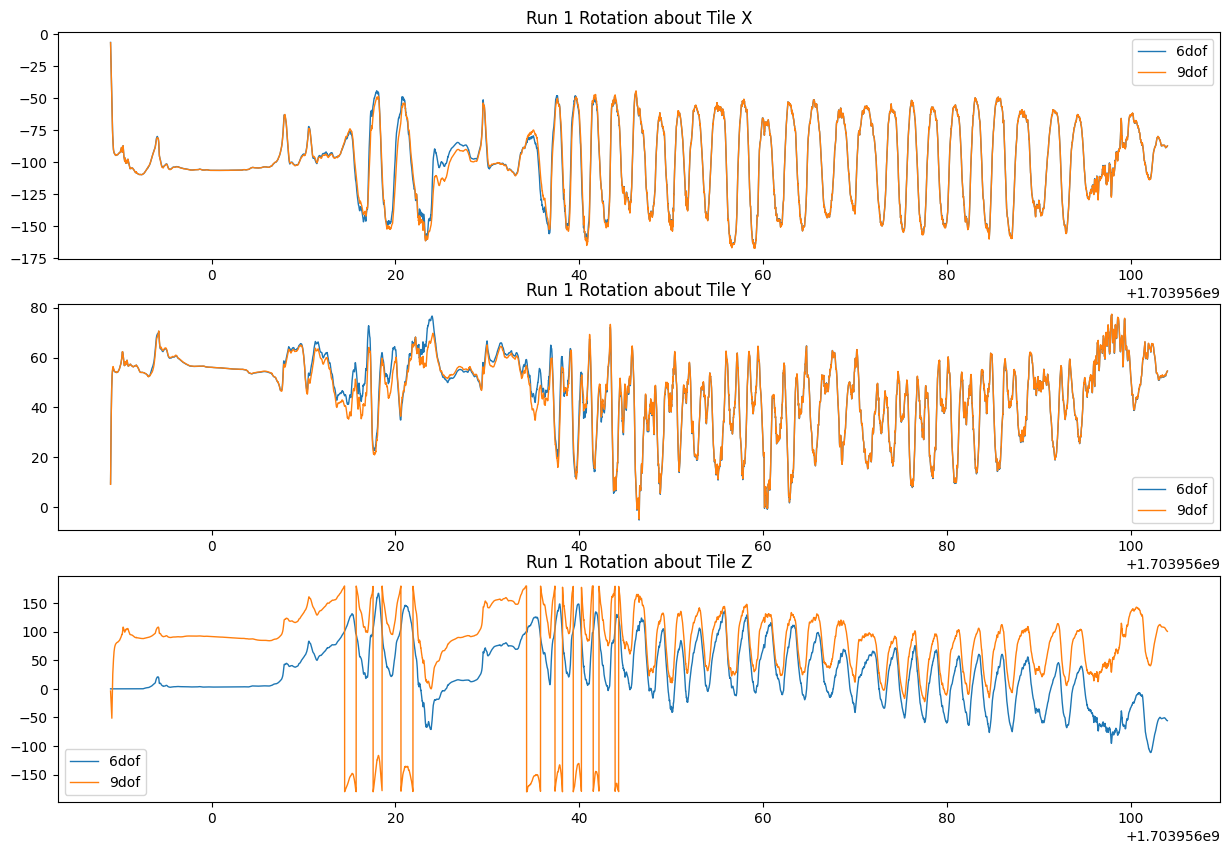

In [7]:
plt.rc('lines', linewidth=1)
fig, ax = plt.subplots(3, figsize=(15, 10))

ax[0].plot(run1.time, run1_2023_12_30_euler6[:, 0], label='6dof')
ax[0].plot(run1.time, run1_2023_12_30_euler9[:, 0], label='9dof')
ax[0].set_title('Run 1 Rotation about Tile X', wrap=True)
ax[0].legend()

ax[1].plot(run1.time, run1_2023_12_30_euler6[:, 1], label='6dof')
ax[1].plot(run1.time, run1_2023_12_30_euler9[:, 1], label='9dof')
ax[1].set_title('Run 1 Rotation about Tile Y', wrap=True)
ax[1].legend()

ax[2].plot(run1.time, run1_2023_12_30_euler6[:, 2], label='6dof')
ax[2].plot(run1.time, run1_2023_12_30_euler9[:, 2], label='9dof')
ax[2].set_title('Run 1 Rotation about Tile Z', wrap=True)
ax[2].legend()

plt.show()

In [8]:
run2_2023_12_30_euler6 = run2.imu6dof()
run2_2023_12_30_euler9 = run2.imu9dof()

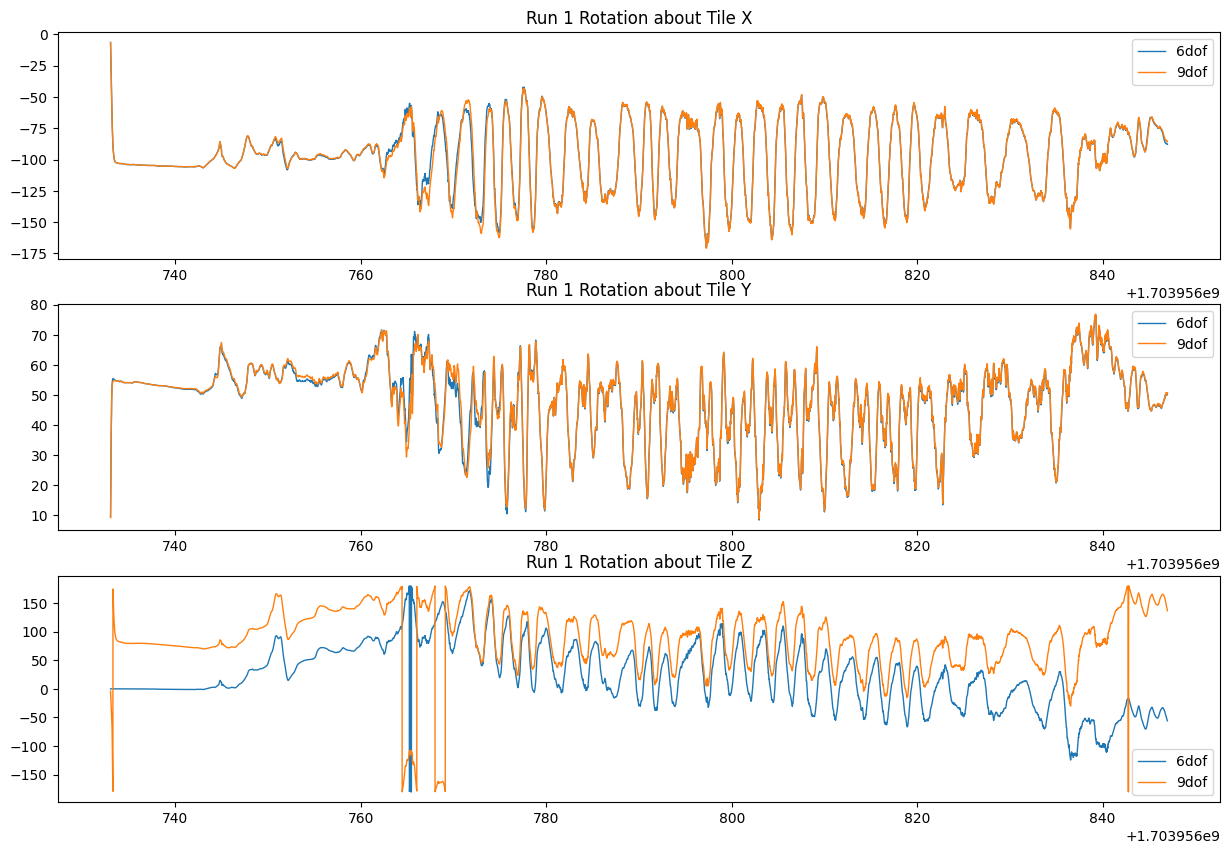

In [9]:
plt.rc('lines', linewidth=1)
fig, ax = plt.subplots(3, figsize=(15, 10))

ax[0].plot(run2.time, run2_2023_12_30_euler6[:, 0], label='6dof')
ax[0].plot(run2.time, run2_2023_12_30_euler9[:, 0], label='9dof')
ax[0].set_title('Run 1 Rotation about Tile X', wrap=True)
ax[0].legend()

ax[1].plot(run2.time, run2_2023_12_30_euler6[:, 1], label='6dof')
ax[1].plot(run2.time, run2_2023_12_30_euler9[:, 1], label='9dof')
ax[1].set_title('Run 1 Rotation about Tile Y', wrap=True)
ax[1].legend()

ax[2].plot(run2.time, run2_2023_12_30_euler6[:, 2], label='6dof')
ax[2].plot(run2.time, run2_2023_12_30_euler9[:, 2], label='9dof')
ax[2].set_title('Run 1 Rotation about Tile Z', wrap=True)
ax[2].legend()

plt.show()